In [1]:
from qem.image_model import ImageModelFitting
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

file = '/home/zzhang/OneDrive/code/qem/data/core_shell/STEM4D_adf.mat'
data = sio.loadmat(file)
adf_4d = data['adf_4d']

file = '/home/zzhang/OneDrive/code/qem/data/core_shell/STEM_adf.mat'
data = sio.loadmat(file)
adf = data['adf']

file = '/home/zzhang/OneDrive/code/qem/data/core_shell/STEM_adf_mustem.mat'
data = sio.loadmat(file)
adf_mustem = data['adf_mustem']

file = '/home/zzhang/OneDrive/code/qem/data/core_shell/spec_atoms.mat'
data = sio.loadmat(file)
spec_atoms = data['spec_atoms']

dx =40/163 
input_coordinates = spec_atoms[:, [2,1]]

# get the unique coordinates by row
input_coordinates = np.unique(input_coordinates, axis=0)

Integrating: 100%|██████████| 232/232 [00:00<00:00, 18186.00it/s]        


(array([0.030079  , 0.02008636, 0.02763232, 0.02096905, 0.02783443,
        0.02015723, 0.02891615, 0.02074499, 0.03936927, 0.04743838,
        0.03900546, 0.04825001, 0.03773374, 0.04944328, 0.03853081,
        0.02963097, 0.0374716 , 0.01579557, 0.04872401, 0.05596994,
        0.04883201, 0.05779033, 0.04696044, 0.05889448, 0.04863093,
        0.05765396, 0.04670442, 0.03803279, 0.02887316, 0.05983912,
        0.06837603, 0.05866956, 0.06973161, 0.05803059, 0.06794612,
        0.06119661, 0.06907124, 0.05636078, 0.04919083, 0.03769683,
        0.02823171, 0.07308974, 0.08046732, 0.0687881 , 0.08189074,
        0.06965714, 0.08027083, 0.06993971, 0.06044602, 0.06917052,
        0.06023588, 0.04864989, 0.03759169, 0.01524798, 0.11865641,
        0.09153708, 0.11562495, 0.09385867, 0.11248092, 0.09439226,
        0.11452673, 0.06924368, 0.0777457 , 0.06839835, 0.05772713,
        0.04732023, 0.03705651, 0.13523493, 0.1134494 , 0.13643351,
        0.12015718, 0.13613789, 0.11529028, 0.13

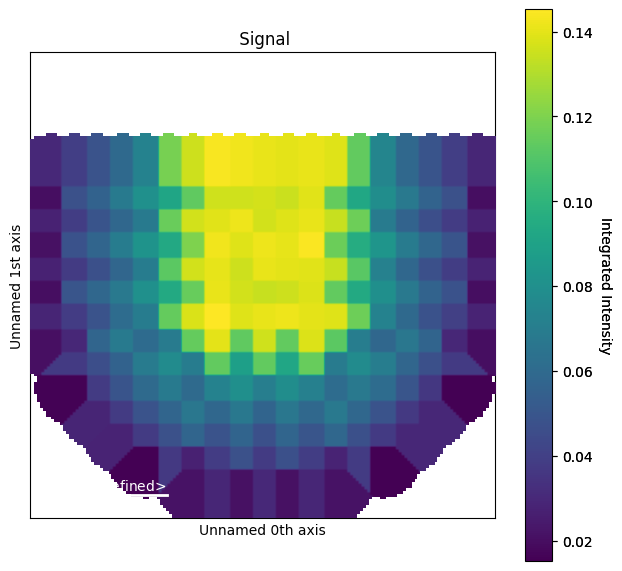

In [2]:
model=ImageModelFitting(adf, dx=dx)

model.import_coordinates(coordinates=input_coordinates/dx)
model.remove_peaks_outside_image()
model.fit_background=False
params = model.init_params()
model.voronoi_integration(plot=True)
# model.plot()

Integrating: 100%|██████████| 232/232 [00:00<00:00, 26453.85it/s]


(array([0.03100674, 0.0214157 , 0.02935171, 0.0219568 , 0.02982648,
        0.02135014, 0.03021336, 0.02137825, 0.04107077, 0.04959697,
        0.04108687, 0.05068135, 0.04013045, 0.05062648, 0.0410059 ,
        0.02998859, 0.03960022, 0.01617072, 0.05225387, 0.06009786,
        0.04981362, 0.06188138, 0.05027349, 0.06071231, 0.05055322,
        0.05929805, 0.04944293, 0.03954767, 0.03087081, 0.06219743,
        0.07049068, 0.06094454, 0.07281318, 0.06111   , 0.07094204,
        0.06125849, 0.07009392, 0.05997373, 0.05068088, 0.03843629,
        0.03057373, 0.07506006, 0.08314611, 0.07438677, 0.08596287,
        0.07401107, 0.08362543, 0.07619551, 0.06338826, 0.07250318,
        0.06336436, 0.05022969, 0.03906108, 0.0158506 , 0.12002524,
        0.09526222, 0.11713548, 0.09938794, 0.11698465, 0.0955946 ,
        0.11897995, 0.07298045, 0.08115248, 0.07302027, 0.05980628,
        0.04896181, 0.03916466, 0.1439132 , 0.11847231, 0.13950128,
        0.1212751 , 0.13835675, 0.11697013, 0.14

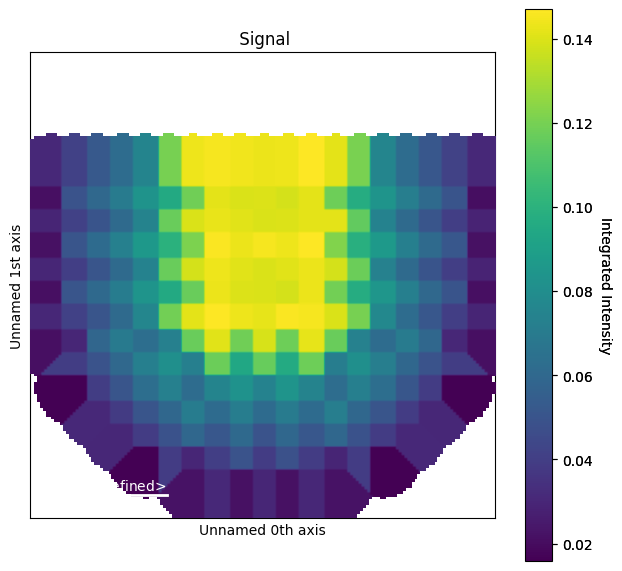

In [4]:
model_mustem=ImageModelFitting(adf_mustem, dx=dx)

model_mustem.import_coordinates(coordinates=input_coordinates/dx)
model_mustem.remove_peaks_outside_image()
model_mustem.fit_background=False
params = model_mustem.init_params()
model_mustem.voronoi_integration(plot=True)
# model.plot()

In [3]:
%matplotlib qt
model.plot_coordinates()

Integrating: 100%|██████████| 232/232 [00:00<00:00, 25815.89it/s]


(array([0.03010126, 0.02015582, 0.02762569, 0.02099707, 0.02785048,
        0.02020665, 0.02894039, 0.02076827, 0.03941968, 0.0474909 ,
        0.03897396, 0.04830188, 0.03769926, 0.04934604, 0.03854511,
        0.02967809, 0.03747706, 0.01578653, 0.04873672, 0.05610099,
        0.04885011, 0.05784159, 0.04706183, 0.05890574, 0.04866656,
        0.05768306, 0.0467625 , 0.03802457, 0.02886779, 0.05990977,
        0.06828908, 0.05869279, 0.06991654, 0.05798063, 0.0679161 ,
        0.06125014, 0.06929771, 0.05663488, 0.04926696, 0.03788117,
        0.02827429, 0.07326303, 0.08028048, 0.069027  , 0.08200949,
        0.06969819, 0.08024133, 0.07005199, 0.06056718, 0.06918237,
        0.06026212, 0.04868568, 0.0376978 , 0.01532397, 0.11857384,
        0.09144865, 0.11573531, 0.09369337, 0.11213035, 0.0945033 ,
        0.1144311 , 0.06926571, 0.07771027, 0.06824554, 0.05798495,
        0.0474215 , 0.03715512, 0.13516876, 0.11327999, 0.1365104 ,
        0.12014262, 0.13647818, 0.11553432, 0.13

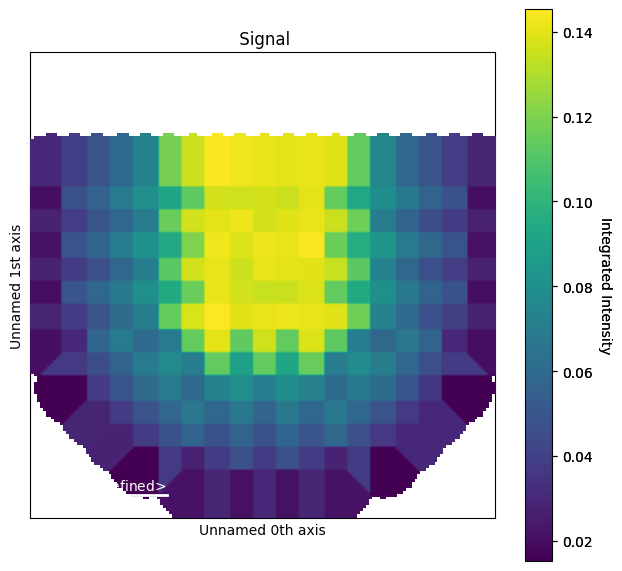

In [3]:
model_4d=ImageModelFitting(adf_4d, dx=dx)

model_4d.import_coordinates(coordinates=input_coordinates/dx)
model_4d.remove_peaks_outside_image()
model_4d.fit_background=False
params = model_4d.init_params()
model_4d.voronoi_integration(plot=True)

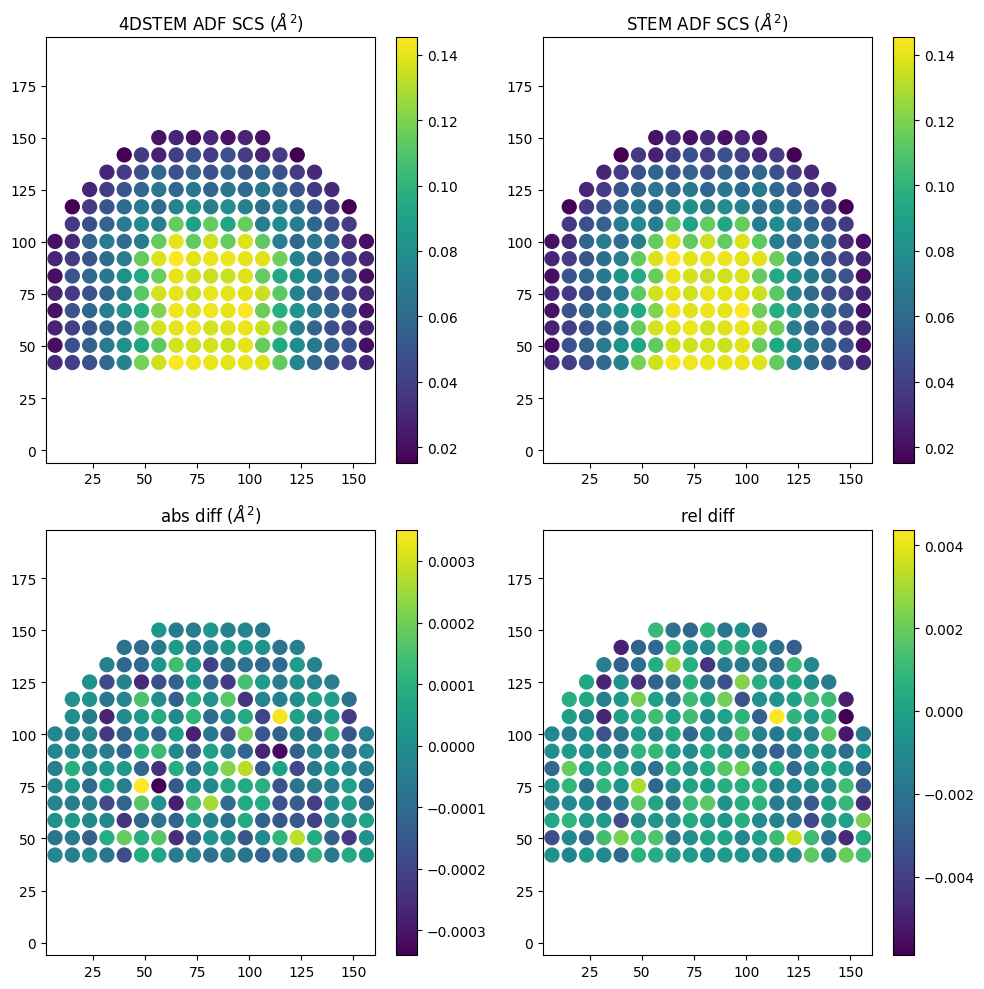

In [14]:
abs_diff = model._voronoi_volume - model_4d._voronoi_volume
rel_diff = (model._voronoi_volume - model_4d._voronoi_volume)/model._voronoi_volume
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(model_4d.coordinates[:,0], model_4d.coordinates[:,1], c=model_4d._voronoi_volume,s=100)
plt.title(r'4DSTEM ADF SCS ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(model.coordinates[:,0], model.coordinates[:,1], c=model._voronoi_volume,s=100)
plt.title(r'STEM ADF SCS ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(model_4d.coordinates[:,0], model_4d.coordinates[:,1], c=abs_diff,s=100)
plt.title(r'abs diff ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(model_4d.coordinates[:,0], model_4d.coordinates[:,1], c=rel_diff,s=100)
plt.title(r'rel diff')
plt.colorbar()
plt.axis('equal')
plt.tight_layout()

plt.savefig('AgAu_diff.png', dpi=300)


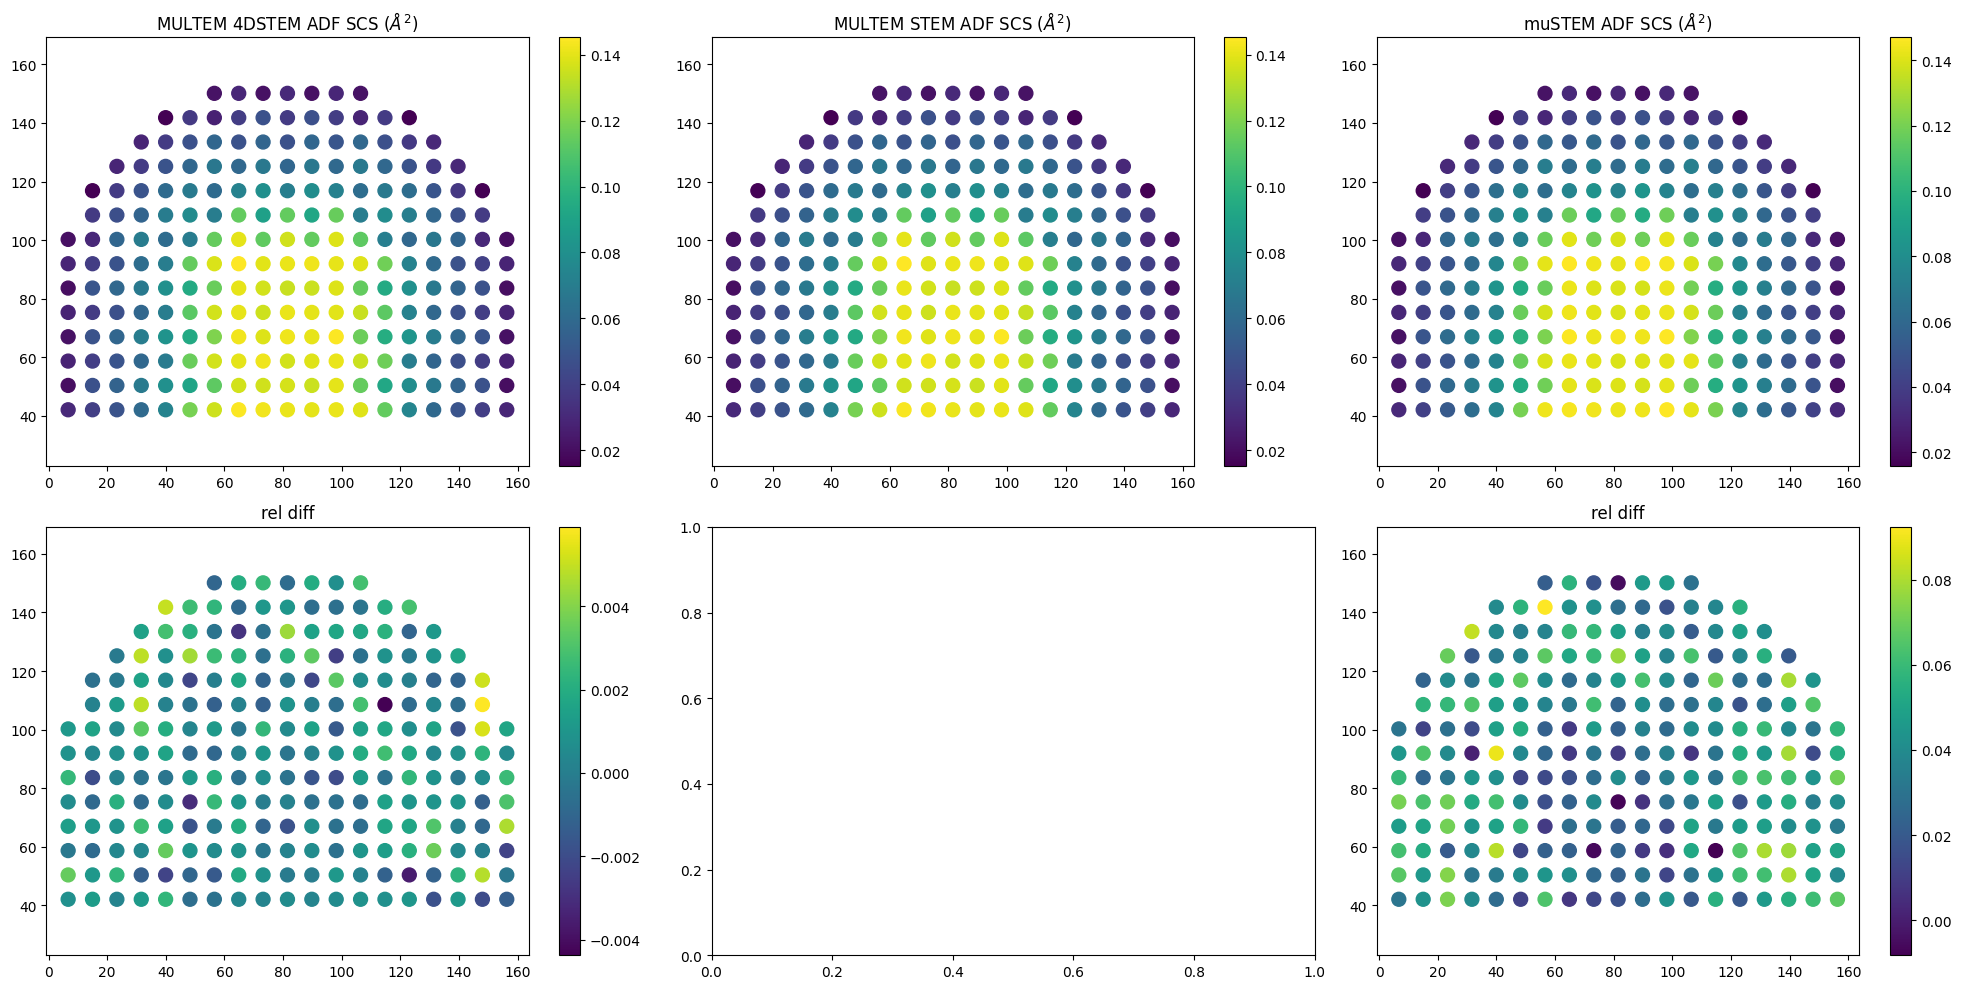

In [15]:
abs_diff = model_4d._voronoi_volume - model_mustem._voronoi_volume
rel_diff_4d = (model_4d._voronoi_volume - model._voronoi_volume)/model._voronoi_volume
rel_diff_mu = (model_mustem._voronoi_volume - model._voronoi_volume)/model._voronoi_volume

plt.subplots(2,3,figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(model_4d.coordinates[:,0], model_4d.coordinates[:,1], c=model_4d._voronoi_volume,s=100)
plt.title(r'MULTEM 4DSTEM ADF SCS ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,3,2)
plt.scatter(model.coordinates[:,0], model.coordinates[:,1], c=model._voronoi_volume,s=100)
plt.title(r'MULTEM STEM ADF SCS ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,3,3)
plt.scatter(model_mustem.coordinates[:,0], model_mustem.coordinates[:,1], c=model_mustem._voronoi_volume,s=100)
plt.title(r'muSTEM ADF SCS ($\AA^2$)')
plt.axis('equal')
plt.colorbar()

plt.subplot(2,3,4)
plt.scatter(model_4d.coordinates[:,0], model_4d.coordinates[:,1], c=rel_diff_4d,s=100)
plt.title(r'rel diff')
plt.colorbar()
plt.axis('equal')
plt.tight_layout()

plt.subplot(2,3,6)
plt.scatter(model_mustem.coordinates[:,0], model_mustem.coordinates[:,1], c=rel_diff_mu,s=100)
plt.title(r'rel diff')
plt.colorbar()
plt.axis('equal')
plt.tight_layout()


plt.savefig('AgAu_diff.png', dpi=300)